## Catmull-Rom splines ##

### Definition of this class of curves ###

The Catmull-Rom interpolation problem defined in [Catmull, E. and R. Rom, *A Class of Local Interpolationg Splines*, in Barnhill R.E. and R.F. Riesenfeld (eds.), Computer Aided Geometric Design, Academic Press, New York, 1974.] is formulated as follows:

Given $n+1$ (2D or 3D) points, $P_0, P_1, \ldots, P_n$,$n\geq 3$, find a piecewise cubic curve, parameterized by
$c:[1, n-1]\to\mathbb{R}^d$ (d=2,3) such 
that $c(i)=P_{i}$, for $i\in\{1,2\ldots, n-1\}$, and the tangent vector at each interpolatory point, $P_i$, $i=\overline{1, n-1}$, be colinear with the vector $\overrightarrow{P_{i-1}P_{i+1}}$:

$$\vec{\dot{c}}(i)=s\overrightarrow{P_{i-1}P_{i+1}},
$$ where $s\in(0,1]$. Usually one takes s=0.5.

Hence given n+1 points, $P_0, P_1, \ldots, P_n$, a CR curve interporlates only the points $P_1, P_2, \ldots, P_{n-1}$.
The first and the last point  contribute  to the defining the tangent at $P_1$, respectively, $P_{n-1}$.



Since the distance between two consecutive knots, $t_i=i$, $t_{i+1}=i+1$ is constant, such a curve is called
uniform parameterized Catmull-Rom curve.

Being a cubic above each interval $[i, i+1]$,  an arc of CR curve on such an interval can be defined
as a B&eacute;zier curve of control points ${\bf b}_0, {\bf b}_1, {\bf b}_2, {\bf b}_3$,
with
${\bf b}_0=P_i, {\bf b}_3=P_{i+1}$.

Taking into account that the tangent at end  points, ${\bf b}_0$ and ${\bf b}_3$, of a B&eacute;zier curve, is
 $3\overrightarrow{{\bf b}_0{\bf b}_1}$, respectively $3\overrightarrow{{\bf b}_2{\bf b}_3}$,
we get:

$$ {\bf b}_1=P_i+s(P_{i+1}-P_{i-1})/3, \:\: {\bf b}_2=P_{i+1}-s(P_{i+2}-P_{i})/3$$



Below we illustrate the above stated properties of a CR curve, defined by 7 points.  Attached to the third arc, joining the points $P_3, P_4$,
is  the B&eacute;zier control polygon defining that arc of curve. The tangent at $P_2$ is obviously parallel to 
$\overrightarrow{P_1P_3}$.

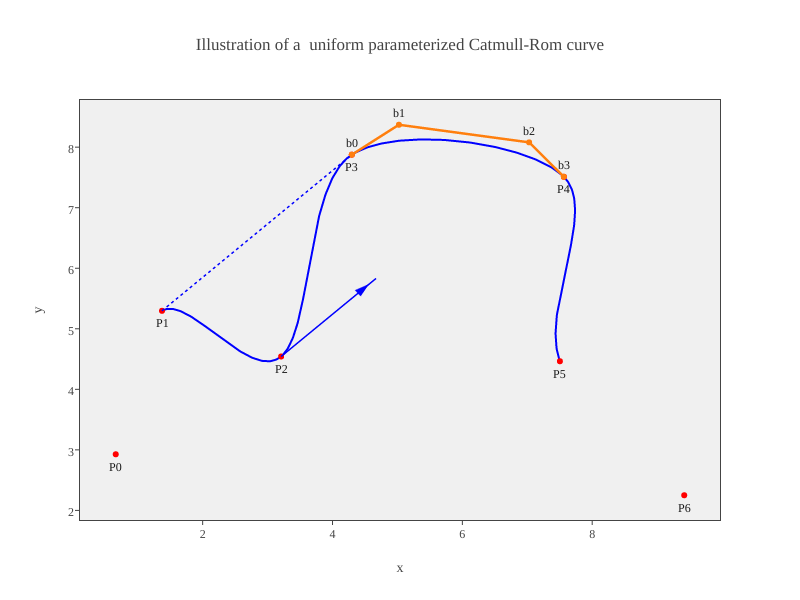

In [1]:
from IPython.display import Image
Image(filename='Imag/Catmull-Rom-curve.png')

Barry and Goldman observed that  Catmull-Rom interpolating curves can be evaluated
at a point using a recursive scheme similar to the [de Boor algorithm](http://nbviewer.jupyter.org/github/empet/geom_modeling/blob/master/FP-Bezier-Bspline.ipynb) for B-spline curves.

Usually a cubic spline curve is $C^2$ at knots. Although the CR curves are only $C^1$ at each knot, they are sometimes called Catmull Rom spline curves, due to the similarities of the algorithms of
evaluation, and other common properties.  

Barry and Goldman [P. J. Barry, R. N. Goldman, *A recursive evaluation algorithm for a class of Catmull–Rom splines*, SIGGRAPH Computer Graphics, 22(4):199-204, 1988] extended the definition of uniform parameterized CR splines to curves whose parameterization incorporates the
distance between two adjacent interpolatory points. 

Namely, given the points $P_0, P_1, \ldots, P_n$, one defines a knot sequence, $t_0, t_1, \ldots, t_{n}$ as follows:
 
$$\begin{array}{lll}t_0&=&0\\
            t_i&=&t_{i-1}+||\overrightarrow{P_{i-1}P_i}||^\alpha, \quad \alpha\in[0,1]\end{array}$$

 A $C^1$-piecewise cubic, that interpolates the given points, i.e. $c(t_i)=P_i$, $i=1,2, \ldots, n-1$, is defined at any $u\in[t_i, t_{i+1}]$ through a recursive scheme in which are involved only four points, $P_{i-1}, P_i, P_{i+1}, P_{i+2}$
 and the knots $t_{i-1}, t_i, t_{i+1}, t_{i+2}$:

$$P_j^r=(1-\omega^{r-1}_j)P^{r-1}_j+\omega^{r-1}_jP^{r-1}_{j+1}, \quad r=1,2,\quad j=i-1, i, i+1, i+2,
$$

with $\omega^r_j(u)=\displaystyle\frac{u-t_j}{t_{j+1+r}-t_j}$. The superscript $r$ points out the level of  recursion. $P_j^0=P_j$.


The  last two points, $P^2_{i-1}$, $P^2_{i}$, are finally interpolated linearly, to get $c(u)$,  the point on the interpolating curve corresponding to the parameter $u\in[t_i, t_{i+1}]$:

$$c(u)=\left(1-\displaystyle\frac{u-t_i}{t_{i+1}-t_i}\right) P^2_{i-1}+\displaystyle\frac{u-t_i}{t_{i+1}-t_i} P^2_{i}$$

We note that in the first two steps, the points $P_j^r$, $r=1,2$, are computed via de Boor algorithm for B-splines, while in the last step, $c(u)$ is computed as in the the [Neville algorithm](https://en.wikipedia.org/wiki/Neville%27s_algorithm) for evaluating Lagrange polynomials.

The parameter $\alpha$ in the definition of knots controls the geometry of the interpolating CR curve.
For $\alpha=0.5$ the corresponding CR curve is called centripetal Catmull-Rom curve, for $\alpha=1$, chordal Catmull
Rom curve, while for $\alpha=0$ we get the initial uniform parameterized CR spline.

For $\alpha$ close to $0$ the corresponding CR curve can exhibit singular points (self intersections or cusps) within short curve segments(with small distance between  $P_i, P_{i+1}$).

In [C Yuksel, S Schaefer, J Keyser,
*Parameterization and Applications of Catmull-Rom Curves*,
Computer Aided Design, 43, 7, 2011] it was deduced that the optimal parameter that corresponds  to CR splines with no singular points is $\alpha=0.5$.
Moreover a centripetal CR curve  follows  more tightly the interpolatory points than CR curves corresponding to $\alpha$ close to 0 or to 1.



That is why centripetal Catmull-Rom splines are now widely used in interactive generation of interpolating curves.

### Python implementation of the Catmull-Rom spline generation ###

Instead of the above mixture of the de Boor and Neville algorithm we generate each segment of CR curve,
as a Bezier curve.

Over each interval $[t_i, t_{i+1}]$,  the CR curve is a cubic polynomial curve, hence it can be defined as
a B&eacute;zier curve, parameterized over $[0,1]$. Theoretically, the standard polynomial parameterization
is obtained applying (using a Computer Algebra System) the two steps of de Boor algorithm defined above, and a step of the Neville algo.
Then this parameterization is converted to one in which the polynomial components are  expressed 
in Bernstein basis, to get the B&eacute;zier form of that polynomial segment of curve.

The expression of the B&eacute;zier control points as combinations of four consecutive interpolatory 
points, $P_{0}, P_1, P_{2}, P_{3}$, involved in the definition of a CR segment, is given in the function  `ctrl_bezier(P, d)`.  `d` is a  list of values involved in knot definition, $d_j=||\overrightarrow{P_{j}P_{j+1}}||^\alpha$, $j=0,1,2$.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `knot_interval`, that computes the values 
$d_j=||\overrightarrow{P_{j}P_{j+1}}||^\alpha$, $j=\overline{0, n-1}$. If we want  define a closed curve, then we extend the list of points $P_0, P_1, \ldots, P_n$ with $P_0, P_1, P_2$:

In [27]:
def knot_interval(i_pts, alpha=0.5, closed=False):
    if len(i_pts)<4:
        raise ValueError('CR-curves need at least 4 interpolatory points')
    #i_pts is the list of interpolatory points P[0], P[1], ... P[n]
    if closed:
        i_pts+=[i_pts[0], i_pts[1], i_pts[2]]
    i_pts=np.array(i_pts)
    dist=np.linalg.norm(i_pts[1:, :]-i_pts[:-1,:], axis=1)
    return dist**alpha
 

def ctrl_bezier(P, d):
    #Associate to 4 consecutive interpolatory points and the corresponding three d-values, 
    #the Bezier control points
    if len(P)!=len(d)+1!=4:
        raise ValueError('The list of points and knot intervals have inappropriate len ')
    P=np.array(P)    
    bz=[0]*4
    bz[0]=P[1]
    bz[1]=(d[0]**2*P[2]-d[1]**2*P[0] +(2*d[0]**2+3*d[0]*d[1]+d[1]**2)*P[1])/(3*d[0]*(d[0]+d[1]))
    bz[2]=(d[2]**2*P[1]-d[1]**2*P[3] +(2*d[2]**2+3*d[2]*d[1]+d[1]**2)*P[2])/(3*d[2]*(d[1]+d[2]))
    bz[3]=P[2]
    return bz

def Bezier_curve(bz, nr=100):
    #implements the de Casteljau algorithm to compute nr points on a Bezier curve
    
    t=np.linspace(0,1, nr)
    N=len(bz) 
    points=[]# the list of points to be computed on the Bezier curve
    for i in range(nr):#for each parameter t[i] evaluate a point on the Bezier curve 
                       #via De Casteljau algorithm
        aa=np.copy(bz) 
        for r in range(1,N):
            aa[:N-r,:]=(1-t[i])*aa[:N-r,:]+t[i]*aa[1:N-r+1,:]# convex combination
        points.append(aa[0,:])                                  
    return points 

def Catmull_Rom(i_pts, alpha=0.5,  closed=False):
    #returns the list of points computed on the interpolating CR curve
    #i_pts the list of interpolatory points P[0], P[1], ...P[n]
    curve_pts=[]#the list of all points to be computed on the CR curve
    d=knot_interval(i_pts, alpha=alpha, closed=closed)
    for k in range(len(i_pts)-3):
        cb=ctrl_bezier(i_pts[k:k+4], d[k:k+3])
        curve_pts.extend(Bezier_curve(cb, nr=100))
    
    return np.array(curve_pts)

Now we give a list of points and define the CR curve corresponding to $\alpha=0,0.5,1$:

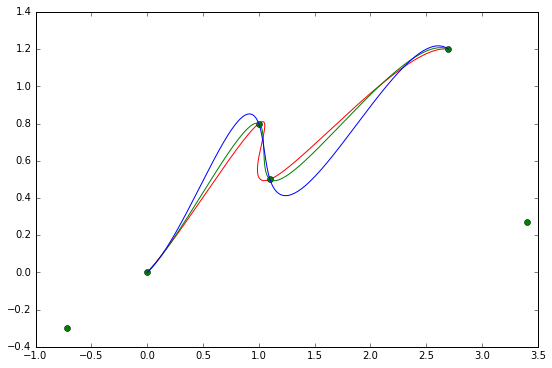

In [28]:
P=[[-0.72, -0.3], [0,0], [1., 0.8], [1.1, 0.5], [2.7, 1.2], [3.4, 0.27]]

curve0=Catmull_Rom(P, alpha=0, closed=False)
curve1=Catmull_Rom(P, alpha=0.5, closed=False)
curve2=Catmull_Rom(P, alpha=1.0, closed=False)
xp, yp=zip(*P)

fig=plt.figure(figsize=(9,6))
plt.plot(curve0[:,0], curve0[:,1], 'r', xp, yp, 'go' )
plt.plot(curve1[:,0], curve1[:,1], 'g')
plt.plot(curve2[:,0], curve2[:,1], 'b')


The green curve is the centripetal CR spline interpolating the central 4 from 6  points. It folows closely
the given interpolatory points.

In order to perform more experiments with CR curves  we give the possibility to generate interactively
the interpolatory points, by clicking the left mouse button at a point position. When the  the 
right button is pressed,
the corresponding curve is generated:

In [7]:
%matplotlib notebook 
# enables interactivity in notebook

In [8]:
def curve_plot(i_pts,  alpha=0.5, closed=False):
    curve_pts=Catmull_Rom(i_pts, alpha, closed=closed)
    # plot the interpolating points marked with dots and the interpolating curve
    plt.plot(curve_pts[:,0], curve_pts[:,1], 'b') 

In [9]:
class catrom(object): 
    
    def __init__(self,  alpha=0.5, closed=False):
        self.interp_pts=[]     # list of interpolating points
        self.alpha=alpha
        self.closed=closed# boolean value
    def callback(self, event):  #select interpolating points with  left  mouse button click
        if event.button==1 and event.inaxes:
            x,y = event.xdata, event.ydata
            self.interp_pts.append([x,y])  
            plt.plot(x, y,  'bo') 
       
        elif event.button==3:   #press right  button to plot the curve
            curve_plot(self.interp_pts,  self.alpha, self.closed)
            plt.draw() 
            
        else: pass
        
    def caxis(self):#define axes for plot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
       
        ax.set_xlim(0,10)
        ax.set_ylim(0,10)
        ax.grid('on')   
        ax.set_autoscale_on(False)
        fig.canvas.mpl_connect('button_press_event', self.callback)

<IPython.core.display.Javascript object>


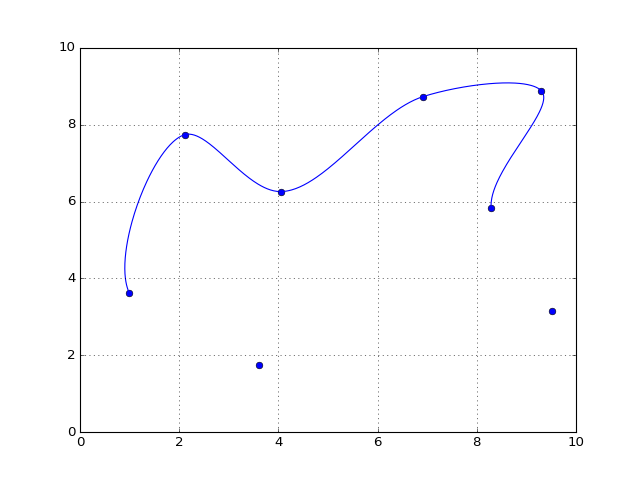

In [10]:
curve=catrom()
curve.caxis()

<IPython.core.display.Javascript object>


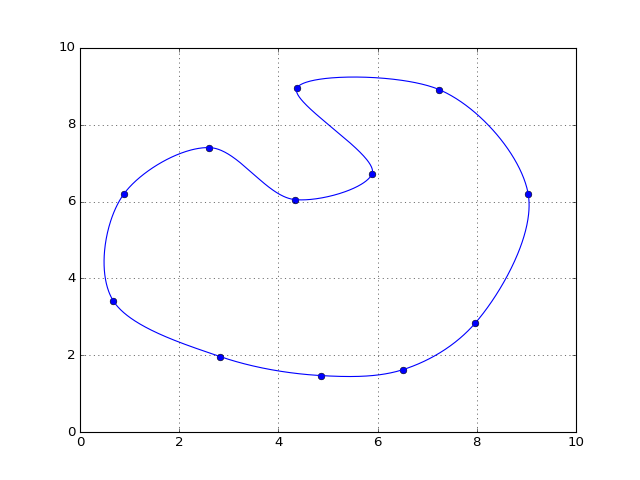

In [11]:
cv=catrom(closed=True)
cv.caxis()

<IPython.core.display.Javascript object>


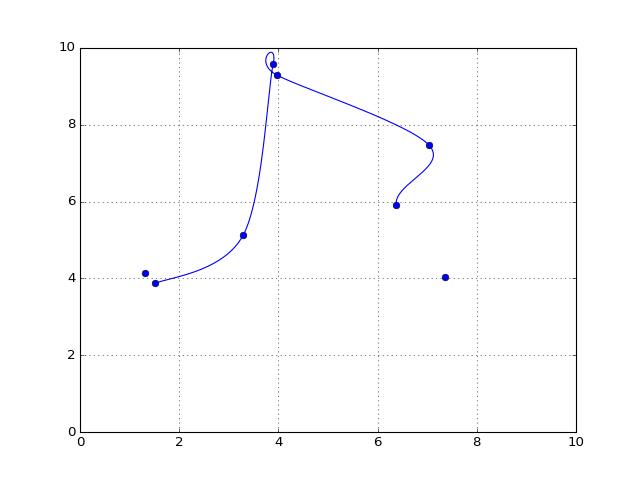

In [13]:
cv2=catrom(alpha=0)
cv2.caxis()

The advantage of defining a segment  of a CR curve as a Bezier curve,  not via de Boor plus Neville algorithm, is that we can compute the tangent direction at any point of the curve.

Namely, if $r:[0,1]\to\mathbb{R}^d$ is the B&eacute;zier parameterization of a segment of CR curve, then
the tangent vector at a point corresponding to the parameter $t\in[0,1]$ is $\vec{\dot{r}}(t)=3({\bf b}_1^{2}(t)-{\bf b}_0^2(t))$, where ${\bf b}^2_0, {\bf b}^2_1$ are points computed in the second level of recursion of the de Casteljau schema ([for details see this notebook](http://nbviewer.jupyter.org/github/empet/geom_modeling/blob/master/FP-Bezier-Bspline.ipynb)):

In [19]:
def tangentBezier(bz,t):
    #bz is the list of Bezier control points and t is value in [0,1]
    if t<0 or t>1:
        raise ValueError('The parameter t must bi in [0,1]')
    a=np.copy(bz) 
    N=a.shape[0] 
    for r in range(1,N-1): 
        a[:N-r,:]=(1-t)*a[:N-r,:]+t*a[1:N-r+1,:]
            
    return (len(bz)-1)*(a[1,:]-a[0,:])     
    

The above functions are independent on the dimension of the space of points. They work well on points in  any space $\mathbb{R}^d$, $d\geq 2$.

Here is an illustration of a Plotly plot of a (2,3)-[torus knot](https://en.wikipedia.org/wiki/Torus_knot) resulted from a centripetal Catmull-Rom interpolation of a set of points on torus:

In [23]:
from IPython.display import HTML
HTML('<iframe src=https://plot.ly/~empet/13914/ width=900 height=600></iframe>')


In [30]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()